# Quant Trading Strategies HW 1 - Madison Rusch

## Data

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13
import quandl
import pandas as pd
import numpy as np
import functools
import warnings
warnings.filterwarnings('ignore')
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
import seaborn as sns

# Fetch Data
@functools.lru_cache(maxsize=1600)
def fetch_quandl(my_data_items, trim_start=None, trim_end=None, returns="pandas"):
    qdata = quandl.get(list(my_data_items), returns=returns, 
                      trim_start=trim_start,
                      trim_end=trim_end,
                      api_key='bXgDCzJUfS5ZxasswLcN')
    return qdata

# Taken from class example
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

In [257]:
securities = ['OWF/NYM_RB_RB', 'OWF/ICE_G_G', 'OWF/NYX_EMA_EMA', 'OWF/CBT_C_C']
dates = ['H2021', 'M2021', 'U2021', 'Z2021', 'H2022', 'M2022', 'U2022', 'Z2022']

# Fetch NYM_RB_RB Data
finalized_data = pd.DataFrame()
security = securities[0]
trim_start = "2020-12-03"
trim_end = "2022-08-31"
for month in dates:
  data = fetch_quandl((f'{security}_{month}_IVM',), trim_start=trim_start, trim_end="2022-08-31")
  data = clean_quandl_columns(data)
  data = data[data['DtT'] > 30]
  if finalized_data.empty:
    finalized_data = data
  else:
    finalized_data = finalized_data.append(data)
  trim_start = finalized_data.index[-1] + pd.DateOffset(1)

W = finalized_data.copy()
display(W)

# Fetch OWF/ICE_G_G Data
finalized_data = pd.DataFrame()
security = securities[1]
trim_start = "2020-12-03"
trim_end = "2022-08-31"
for month in dates:
  data = fetch_quandl((f'{security}_{month}_IVM',), trim_start=trim_start, trim_end="2022-08-31")
  data = clean_quandl_columns(data)
  data = data[data['DtT'] > 30]
  if finalized_data.empty:
    finalized_data = data
  else:
    finalized_data = finalized_data.append(data)
  trim_start = finalized_data.index[-1] + pd.DateOffset(1)

X = finalized_data.copy()
X['Future'] = X['Future']*0.0033
display(X)



,Future,AtM,RR25,RR10,Fly25,Fly10,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,MinMoney,MaxMoney,DtE,DtT
Date,,,,,,,,,,,,,,,,
2020-12-03,1.2867,0.404940,-0.044632,-0.066643,0.020366,0.037586,-0.221127,1.574470,1.714716,-19.976051,-4.980849,73.815119,-0.402904,0.389773,82.0,85.0
2020-12-04,1.2951,0.393243,-0.054731,-0.081039,0.024473,0.047921,-0.269195,1.937343,2.017534,-24.032997,-5.241950,87.494058,-0.409411,0.383266,81.0,84.0
2020-12-07,1.2850,0.401325,-0.060988,-0.080354,0.013237,0.028651,-0.296558,1.136817,2.781911,-14.084529,-9.812550,52.360167,-0.390021,0.369818,78.0,81.0
2020-12-08,1.2851,0.392393,-0.044372,-0.068010,0.010609,0.022612,-0.215338,1.003057,1.490991,-13.924953,-3.699306,57.763046,-0.378670,0.353479,77.0,80.0
2020-12-09,1.2983,0.397532,-0.028744,-0.054577,0.002399,0.009430,-0.123218,0.301424,-0.066674,-2.823388,3.541613,8.807728,-0.366416,0.348710,76.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,2.5303,0.514892,-0.000050,0.001502,0.010043,0.024201,-0.028547,0.383487,0.325061,-2.046838,-0.940396,4.171304,-0.496555,0.575740,92.0,97.0
2022-08-26,2.5483,0.505202,-0.010040,-0.009077,0.016306,0.034665,-0.082381,0.689310,0.865038,-4.664420,-2.465564,10.399727,-0.497172,0.568651,91.0,96.0
2022-08-29,2.6100,0.519482,0.006648,0.011423,0.009628,0.025270,-0.002867,0.349494,0.123217,-1.573859,-0.297433,3.268859,-0.489347,0.598794,88.0,93.0


,Future,AtM,RR25,RR10,Fly25,Fly10,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,MinMoney,MaxMoney,DtE,DtT
Date,,,,,,,,,,,,,,,,
2020-12-03,1.335675,0.377799,-0.046897,-0.093657,0.003742,0.020871,-0.197272,0.368820,0.288525,-1.045831,-0.758664,1.264430,-0.442588,0.351100,90.85,98.0
2020-12-04,1.339800,0.379012,-0.047249,-0.094644,0.003823,0.020878,-0.198592,0.379745,0.254675,-1.311176,-0.478532,2.795570,-0.445672,0.348017,89.85,97.0
2020-12-07,1.353000,0.382357,-0.047298,-0.094844,0.003644,0.020708,-0.200069,0.369966,0.248299,-1.088128,-0.426899,2.156216,-0.436427,0.346871,86.85,94.0
2020-12-08,1.352175,0.375657,-0.047403,-0.095445,0.003729,0.020451,-0.204182,0.389794,0.231478,-1.422499,-0.341754,3.332610,-0.435817,0.338823,85.85,93.0
2020-12-09,1.342275,0.374841,-0.069072,-0.126562,0.002159,0.018644,-0.307065,0.240010,1.129727,0.776946,-4.006904,-6.426638,-0.447517,0.319738,84.85,92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,3.566475,0.533050,0.003337,0.029798,0.019282,0.067102,-0.047928,0.537607,0.441530,-1.191341,-0.774163,1.527132,-0.596849,0.481961,101.85,109.0
2022-08-26,3.573900,0.534348,0.002455,0.028853,0.017093,0.063998,-0.048396,0.451841,0.494208,-0.353067,-1.097934,-0.560638,-0.590561,0.479881,100.85,108.0
2022-08-29,3.569775,0.506983,0.002243,0.027995,0.016286,0.061653,-0.044677,0.500881,0.499476,-0.593755,-1.120928,-0.139479,-0.556616,0.481036,97.85,105.0


In [258]:
# Fetch OWF/NYX_EMA_EMA Data
finalized_data = pd.DataFrame()
security = securities[2]
trim_start = "2020-12-03"
trim_end = "2022-08-31"
for month in dates:
  data = fetch_quandl((f'{security}_{month}_IVM',), trim_start=trim_start, trim_end="2022-08-31")
  if not data.empty:
    data = clean_quandl_columns(data)
    data = data[data['DtT'] > 30]
    if finalized_data.empty:
      finalized_data = data
    else:
      finalized_data = finalized_data.append(data)
    trim_start = finalized_data.index[-1] + pd.DateOffset(1)

Y = finalized_data.copy()
display(Y)

# Fetch OWF/CBT_C_C Data
finalized_data = pd.DataFrame()
security = securities[3]
trim_start = "2020-12-03"
trim_end = "2022-08-31"
for month in dates:
  data = fetch_quandl((f'{security}_{month}_IVM',), trim_start=trim_start, trim_end="2022-08-31")
  if not data.empty:
    data = clean_quandl_columns(data)
    data = data[data['DtT'] > 30]
    if finalized_data.empty:
      finalized_data = data
    else:
      finalized_data = finalized_data.append(data)
    trim_start = finalized_data.index[-1] + pd.DateOffset(1)

Z = finalized_data.copy()
Z['Future'] = Z['Future']*0.4362
display(Z)

,Future,AtM,RR25,RR10,Fly25,Fly10,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,MinMoney,MaxMoney,DtE,DtT
Date,,,,,,,,,,,,,,,,
2020-12-03,179.50,0.112473,0.004698,0.009025,0.001378,0.004262,0.028721,0.195296,-0.343608,-0.677563,10.142048,-25.254191,-0.179540,0.247904,377.0,398.0
2020-12-04,179.50,0.112495,0.004672,0.009138,0.001296,0.004160,0.028391,0.178612,-0.265590,-0.141126,7.778233,-24.090830,-0.179540,0.247904,376.0,397.0
2020-12-07,179.50,0.112516,0.004706,0.009010,0.001290,0.004147,0.029279,0.178621,-0.376472,0.130371,10.549294,-34.520013,-0.179540,0.247904,373.0,394.0
2020-12-08,181.00,0.113020,0.005005,0.010447,0.001335,0.003645,0.026846,0.192821,0.510023,-3.874963,-13.962588,72.552338,-0.187862,0.239582,372.0,393.0
2020-12-09,183.25,0.113570,0.006021,0.011222,0.000934,0.003687,0.039086,0.081332,-0.491055,4.383751,8.492318,-77.126475,-0.200216,0.227228,371.0,392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-29,247.00,0.254748,0.016948,0.029558,-0.000029,-0.001936,0.241548,-0.377324,-2.441750,-88.819738,-220.448266,7433.692833,-0.088853,0.111013,16.0,37.0
2021-11-30,237.00,0.243409,0.018308,0.032649,0.001224,0.001418,0.273454,0.751561,-1.020242,-241.570576,-548.440285,17859.936496,-0.083565,0.104094,15.0,36.0
2021-12-01,240.00,0.247201,0.017756,0.030908,0.000545,0.000393,0.281364,-0.002245,-10.271643,-36.249316,688.572819,-1750.603308,-0.082476,0.102857,14.0,35.0


,Future,AtM,RR25,RR10,Fly25,Fly10,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,MinMoney,MaxMoney,DtE,DtT
Date,,,,,,,,,,,,,,,,
2020-12-03,186.093825,0.229092,0.036372,0.060749,0.004145,0.015324,0.267001,0.231812,-5.572110,23.556002,30.636320,-142.316040,-0.256813,0.324217,78.24,99.0
2020-12-04,183.476625,0.221506,0.039767,0.065505,0.003853,0.013561,0.306585,0.111582,-6.711515,30.344407,28.244359,-162.464473,-0.212796,0.338381,77.24,98.0
2020-12-07,184.948800,0.228397,0.038099,0.068305,0.004437,0.016696,0.279617,0.252955,-4.625690,24.728124,3.213478,-88.064235,-0.206189,0.347196,74.24,95.0
2020-12-08,183.149475,0.225853,0.038944,0.066198,0.005350,0.019168,0.293660,0.470247,-6.625399,24.768622,40.102615,-169.814560,-0.225827,0.340165,73.24,94.0
2020-12-09,184.894275,0.227664,0.037713,0.063003,0.003659,0.014919,0.295050,0.108807,-7.194378,36.337737,47.524583,-256.367850,-0.220493,0.330684,72.24,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,283.530000,0.312410,0.026698,0.042150,0.003339,0.014786,0.137879,0.083284,-1.843088,6.915149,9.196139,-34.443741,-0.303186,0.400324,92.24,111.0
2022-08-26,289.745850,0.307925,0.020578,0.028598,0.001312,0.010014,0.117419,-0.069961,-2.095902,9.852084,11.324472,-51.402462,-0.304253,0.378637,91.24,110.0
2022-08-29,297.924600,0.315254,0.016181,0.019187,0.000954,0.009130,0.094765,-0.071436,-1.930955,9.653384,9.404430,-53.253399,-0.311887,0.350801,88.24,107.0


In [259]:
# W X Spread
w_x_spread = (X['Future'] - W['Future']).rename('Spread')
display(w_x_spread.to_frame())

# Z Y Spread
z_y_spread = (Z['Future'] - Y['Future']).rename('Spread')
display(z_y_spread.to_frame())


,Spread
Date,
2020-12-03,0.048975
2020-12-04,0.044700
2020-12-07,0.068000
2020-12-08,0.067075
2020-12-09,0.043975
...,...
2022-08-25,1.036175
2022-08-26,1.025600
2022-08-29,0.959775


,Spread
Date,
2020-12-03,6.593825
2020-12-04,3.976625
2020-12-07,5.448800
2020-12-08,2.149475
2020-12-09,1.644275
...,...
2022-08-25,NaN
2022-08-26,NaN
2022-08-29,NaN


# Analysis

## W X Spread (NYM_RB and ICE_G)

In [260]:
w_x_spread.describe().to_frame()

,Spread
count,450.000000
mean,0.010279
std,0.267353
min,-0.364150
25%,-0.189831
50%,-0.024125
75%,0.058163
max,1.036175


In [261]:
# Tail Risk
print("The Skew of the Gasoline/Oil Futures Spreads:")
print(round(w_x_spread.skew(), 4))

print("The Kurtosis of the Gasoline/Oil Futures Spreads:")
print(round(w_x_spread.kurtosis(), 4))

The Skew of the Gasoline/Oil Futures Spreads:
1.5582
The Kurtosis of the Gasoline/Oil Futures Spreads:
2.664


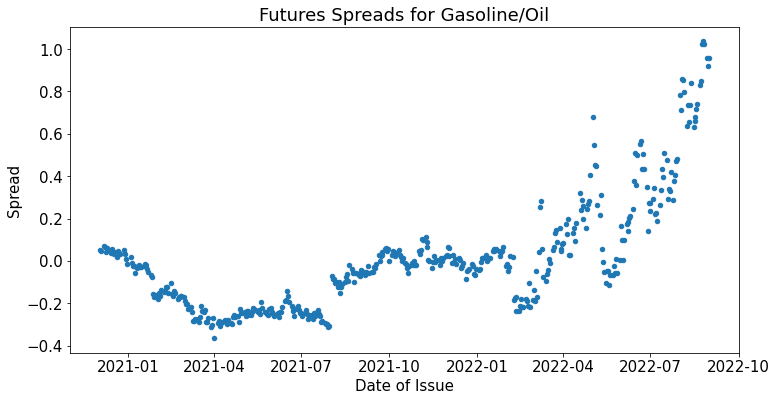

In [262]:
w_x_spreads = w_x_spread.to_frame()
w_x_spreads.reset_index().set_index('Date')
w_x_spreads.rename(columns={'Spread': 'WX Spread'}, inplace=True)
w_x_spreads.reset_index().plot(kind='scatter', x='Date', y='WX Spread')
plt.xlabel('Date of Issue')
plt.ylabel('Spread')
plt.title('Futures Spreads for Gasoline/Oil')
plt.show()

In [263]:
w_x_spreads['Rolling Average (15 day)'] = w_x_spreads['WX Spread'].rolling(15).mean()
w_x_spreads = w_x_spreads.dropna()
w_x_spreads['Diff'] = w_x_spreads['WX Spread'] - w_x_spreads['Rolling Average (15 day)']
display(w_x_spreads)

display(w_x_spreads['Diff'].describe().to_frame())
print("The median of the diffs between the actual spreads and the 15 day rolling average is:")
print(round(w_x_spreads['Diff'].median(), 4))

,WX Spread,Rolling Average (15 day),Diff
Date,,,
2020-12-23,0.038525,0.046002,-0.007477
2020-12-24,0.030375,0.044762,-0.014387
2021-01-18,-0.024550,-0.011825,-0.012725
2021-01-19,-0.014950,-0.016322,0.001372
2021-01-20,-0.019925,-0.019670,-0.000255
...,...,...,...
2022-08-25,1.036175,0.771227,0.264948
2022-08-26,1.025600,0.786478,0.239122
2022-08-29,0.959775,0.807917,0.151858


,Diff
count,380.000000
mean,0.011420
std,0.101132
min,-0.371297
25%,-0.032270
50%,0.000868
75%,0.049788
max,0.384165


The median of the diffs between the actual spreads and the 15 day rolling average is:
0.0009


### Summary
Looking just at the spreads for the Gasoline/Oil futures, we can see that overall they seem very tightly grouped. The standard deviation is small, with a value of 0.26, and the min-max spread is about 1.4. Looking at the skew and kurtosis, we can also see that the spreads are positively skewed, but with a fairly large Kurtosis of 2.66. 

Moving on to the scatter plot, the skew and kurtosis numbers are supported by the visualization, as we can see the majority of the spreads are positive. This implies that we may need to scale one of our datasets, or that there are additional factors not included which would bring the prices more in alignment. There also seems to be an overall trend of increasing spreads after February 2022, which might also bear further investigation.

When conducting an analysis of the spread difference, I used the 15 day rolling average of the spreads for comparison. I found the mean and median both were close to zero (as expected) and that the largest deviation for any given spread compared to the average was 0.38.

## Y Z Spread (NYX_EMA and CBT_C)

In [264]:
z_y_spread.describe().to_frame()

,Spread
count,250.000000
mean,31.657841
std,25.342888
min,-15.030975
25%,8.524006
50%,35.072525
75%,47.267856
max,94.102225


In [265]:
# Tail Risk
print("The Skew of the Corn Futures Spreads:")
print(round(z_y_spread.skew(), 4))

print("The Kurtosis of the Corn Futures Spreads:")
print(round(z_y_spread.kurtosis(), 4))


The Skew of the Corn Futures Spreads:
0.3169
The Kurtosis of the Corn Futures Spreads:
-0.4893


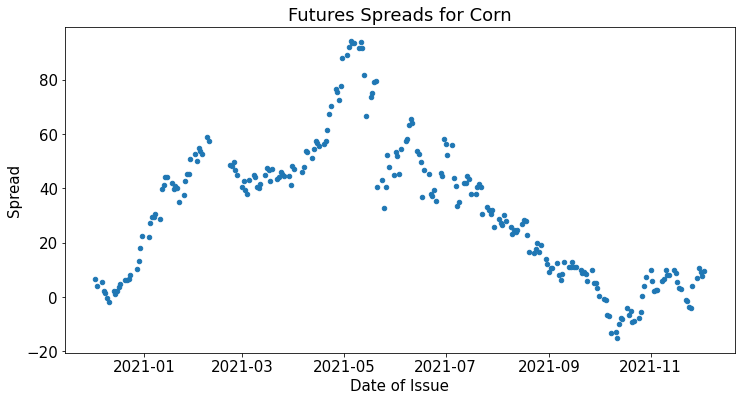

In [266]:
z_y_spreads = z_y_spread.to_frame()
z_y_spreads.reset_index().set_index('Date')
z_y_spreads.rename(columns={'Spread': 'ZY Spread'},inplace=True)
z_y_spreads.reset_index().plot(kind='scatter', x='Date', y='ZY Spread')
plt.xlabel('Date of Issue')
plt.ylabel('Spread')
plt.title('Futures Spreads for Corn')
plt.show()

In [267]:
z_y_spreads['Rolling Average (15 day)'] = z_y_spreads['ZY Spread'].rolling(15).mean()
z_y_spreads = z_y_spreads.dropna()
z_y_spreads['Diff'] = z_y_spreads['ZY Spread'] - z_y_spreads['Rolling Average (15 day)']
display(z_y_spreads)

display(z_y_spreads['Diff'].describe().to_frame())
print("The median of the diffs between the actual spreads and the 15 day rolling average is:")
print(round(z_y_spreads['Diff'].median(), 4))

,ZY Spread,Rolling Average (15 day),Diff
Date,,,
2020-12-23,6.590450,3.391595,3.198855
2020-12-24,8.226200,3.500420,4.725780
2021-01-18,41.894825,29.540285,12.354540
2021-01-19,39.691200,31.491043,8.200157
2021-01-20,40.946400,33.336190,7.610210
...,...,...,...
2021-11-29,6.977450,4.274612,2.702838
2021-11-30,10.598025,4.545382,6.052643
2021-12-01,9.342825,4.497780,4.845045


,Diff
count,194.000000
mean,-1.166742
std,9.896430
min,-42.555842
25%,-6.635658
50%,-1.303662
75%,4.749501
max,22.701127


The median of the diffs between the actual spreads and the 15 day rolling average is:
-1.3037


### Summary
Looking now at the spreads for the Corn futures, we can see that the spreads are much larger, with a min of -15.03 and a max of 94.10. This may be attributed to an incorrect scaling factor, or possibly some other factor that contributes to mispricing. In spite of the larger spreads, this set of data is much less skewed, with a small positive skew of 0.31. Additionally, it's Kurtosis is much smaller, with a magnitude of only 0.49 (compared to 2.66 for Oil). 

Moving on to the scatter plot, we again see the largely positive spreads, and very little clustering of the spreads around zero. Contrary to the Gasoline/Oil futures, in this set of data we have increasing spreads until May 2021, and then overall a decline in spread values until the end of the dataset in December 2022. 

When conducting an analysis of the spread difference, I once again used the 15 day rolling average of the spreads for comparison. I found the mean and median this time were much further from zero, with a mean of -1.17 and a median of -1.3. This seems to imply larger deviations from the average, but this may be explained by the larger magnitudes of spreads overall.

### Correlation
I continued my analysis by checking the correlations of the spreads, and it seems there is a fairly strong negative correlation between them. 

,WX Spread,ZY Spread
Date,,
2020-12-23,0.038525,6.590450
2020-12-24,0.030375,8.226200
2021-01-18,-0.024550,41.894825
2021-01-19,-0.014950,39.691200
2021-01-20,-0.019925,40.946400
...,...,...
2021-11-29,0.021750,6.977450
2021-11-30,0.027975,10.598025
2021-12-01,0.065100,9.342825


<AxesSubplot: >

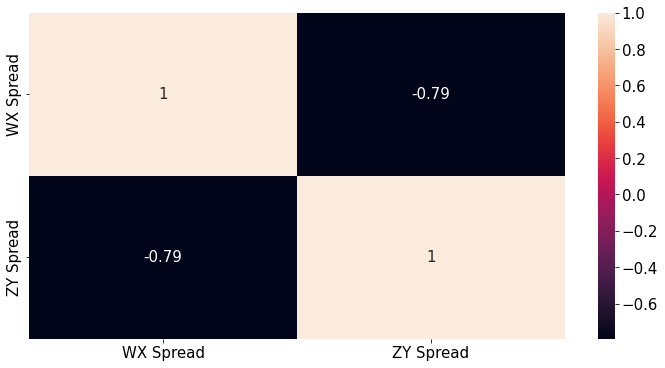

In [268]:
both_spreads = pd.concat([w_x_spreads['WX Spread'],z_y_spreads['ZY Spread']], axis=1)
both_spreads.dropna(inplace=True)
display(both_spreads)
sns.heatmap(both_spreads.corr(),annot=True)


### Conclusion

For this particular assignment, I analyzed data relating to Gasoline/Oil Futures and Corn Futures. I found that while the min and maxes of their spreads varied quite a bit over the time period studied, on a period to period basis the spreads tended to be grouped. There was also negative correlation between the spreads of the futures, meaning that when the spreads of the Gasoline futures widened, the spread on Corn tended to shrink. This would be an interesting point of further investigation if analysis on these two commodities were to continue.

A challenge I faced while completing this homework was the missing data in the NYX_EMA data set. It only contained futures issued through December 3, 2021. This left me a year's worth of data, which I felt was sufficient to continue analysis on; however, for more thorough and accurate results, a secondary data source may be needed to fill in the gap. A second challenge I faced was the difference in magnitude between each dataset's spreads. It made comparison of summary statistics more difficult and implied that there was additional information missing which would explain more of the difference in price.

Overall the key takeaways were that both datasets tended towards positive spreads, as represented by their positive skews, and that spreads rarely deviated much from the 15 day rolling average. There is definitely still avenues for exploration in this data, and I think running it on a larger dataset would provide a more accurate picture.